# ESS Immigration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from essutils import utils
imm = utils.get_immigration_data()

In [ ]:
imm[imm.cntry == "FR"].imdetbs.value_counts().sort_index().plot(kind="bar")

In [ ]:
countries = imm.cntry.unique()

In [ ]:
for c in countries:
    data = imm[(imm.cntry == c) & (imm.essround == 7)]
    # print("Country", c)
    qout = data.imdetmr.value_counts().sort_index()
    if not qout.empty:
        fig, ax = plt.subplots()
        ax.set_title(f"imdetbs for country {c}")
        qout.plot(kind="bar")
        plt.show()
    else:
        print(f"No data for country {c}")

In [ ]:
 def explore_imm(var):
    for c in countries:
        data = imm[(imm.cntry == c)]
        fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
        for round, ax_num in [(1, 0), (7, 1)]:
            rdata = data[data.essround == round]
            n_obs, _ = rdata.shape
            qout = rdata[var].value_counts().sort_index()
            ax = axes[ax_num]
            if not qout.empty:
                qout = qout/n_obs
                ax.set_title(f"{var} \n for country {c} round {round}")
                qout.plot(ax=ax, kind="bar")
            else:
                ax.set_title(f"No data for {var}\n country {c} round {round}")
        plt.show()

In [ ]:
explore_imm("imdetmr")

In [ ]:
explore_imm("eimpcnt")

In [ ]:
explore_imm("gvrfgap")

In [ ]:
imm.imdetmr.value_counts().index.map(np.int32)

In [ ]:
imm[(imm.cntry == "AT")].shape

In [123]:
imm.columns

Index(['cntry', 'cname', 'cedition', 'cproddat', 'cseqno', 'name', 'essround',
       'edition', 'idno', 'dweight', 'pspwght', 'pweight', 'acetalv',
       'eimpcnt', 'gvrfgap', 'imbleco', 'imdetbs', 'imdetmr', 'imtcjob',
       'imwbcrm', 'lwdscwp', 'noimbro', 'pplstrd', 'qfimchr', 'qfimcmt',
       'qfimedu', 'qfimlng', 'qfimwht', 'qfimwsk'],
      dtype='object')

In [124]:
def explore_imm2(var, countries=None):
    vars = ['acetalv', 'eimpcnt', 'gvrfgap', 'imbleco', 'imdetbs', 'imdetmr', 'imtcjob',
       'imwbcrm', 'lwdscwp', 'noimbro', 'pplstrd', 'qfimchr', 'qfimcmt',
       'qfimedu', 'qfimlng', 'qfimwht', 'qfimwsk']
    assert(var in vars)
    if not countries:
        countries=imm.cntry.unique()
    for c in countries:
        data = imm[(imm.cntry == c)]
        fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
        for round, ax_num in [(1, 0), (7, 1)]:
            rdata = data[data.essround == round]
            n_obs, _ = rdata.shape
            qout = rdata[var].value_counts().sort_index()
            ax = axes[ax_num]
            if not qout.empty:
                qout = qout/n_obs
                ax.set_title(f"{var} \n for country {c} round {round}")
                qout.plot(ax=ax, kind="bar")
            else:
                ax.set_title(f"No data for {var}\n country {c} round {round}")
        plt.show()

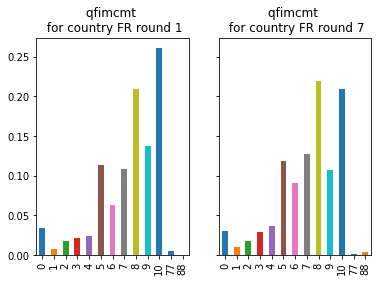

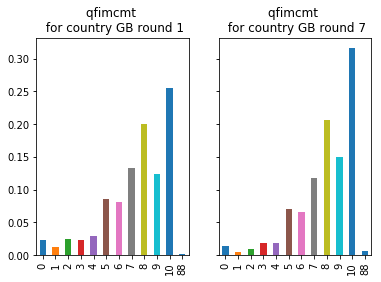

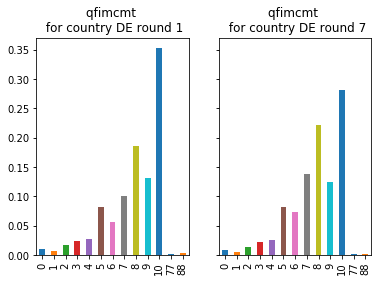

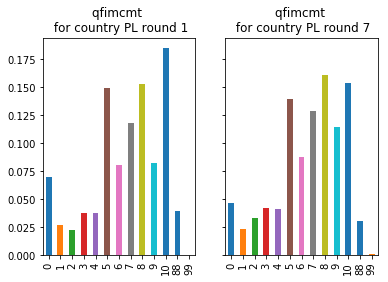

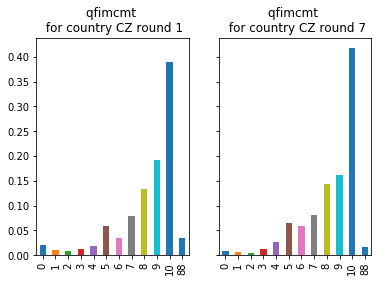

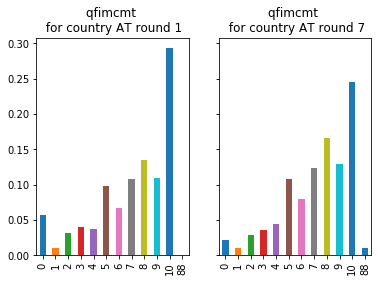

In [131]:
explore_imm2("qfimcmt", countries=["FR", "GB", "DE", "PL", "CZ", "AT"])

In [141]:
x = imm.dweight*imm.qfimcmt

In [145]:
x.head()/imm.dweight.sum()

0    0.000115
1    0.000057
2    0.000115
3    0.000069
4    0.002015
dtype: float64

In [143]:
imm.qfimcmt.head()

0    10
1    10
2    10
3     6
4    88
Name: qfimcmt, dtype: int64

In [144]:
imm.dweight.sum()

82549.1342

In [146]:
def weighted_value_counts(x, *args, **kwargs):
    normalize = kwargs.get('normalize', False)
    c0 = x.columns[0]
    c1 = x.columns[1]
    xtmp = x[[c0,c1]].groupby(c0).agg({c1:'sum'}).sort_values(c1,ascending=False)
    s = pd.Series(index=xtmp.index, data=xtmp[c1], name=c0)
    if normalize:
        s = s / x[c1].sum()
    return s

In [151]:
weighted_value_counts(imm[["qfimcmt", "dweight"]], normalize=True)

qfimcmt
10    0.260963
8     0.184036
9     0.134810
7     0.122877
5     0.095731
6     0.072214
4     0.029049
0     0.028783
3     0.026195
2     0.019481
88    0.013139
1     0.011050
99    0.001023
77    0.000648
Name: qfimcmt, dtype: float64

In [162]:
def explore_imm3(var, countries=None):
    vars = ['acetalv', 'eimpcnt', 'gvrfgap', 'imbleco', 'imdetbs', 'imdetmr', 'imtcjob',
       'imwbcrm', 'lwdscwp', 'noimbro', 'pplstrd', 'qfimchr', 'qfimcmt',
       'qfimedu', 'qfimlng', 'qfimwht', 'qfimwsk']
    assert(var in vars)
    if not countries:
        countries=imm.cntry.unique()
    for c in countries:
        data = imm[(imm.cntry == c)]
        fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
        for round, ax_num in [(1, 0), (7, 1)]:
            rdata = data[data.essround == round]
            qout = weighted_value_counts(rdata[[var, "pspwght"]], normalize=True)
            qout = qout.sort_index()
            ax = axes[ax_num]
            if not qout.empty:
                ax.set_title(f"{var} \n for country {c} round {round}")
                qout.plot(ax=ax, kind="bar")
            else:
                ax.set_title(f"No data for {var}\n country {c} round {round}")
        plt.show()

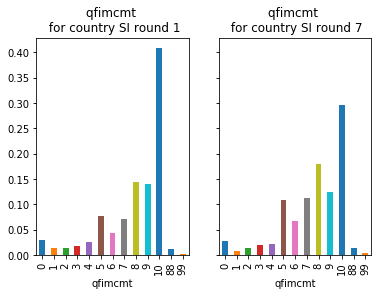

In [171]:
explore_imm3("qfimcmt", countries=["SI"])

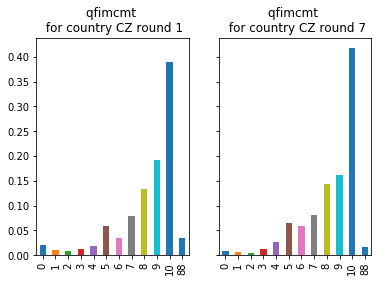

In [165]:
explore_imm2("qfimcmt", countries=["CZ"])

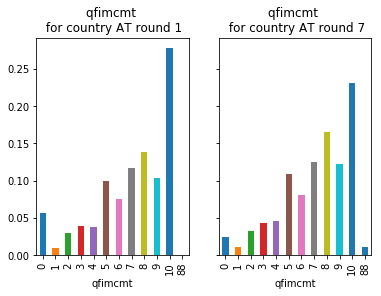

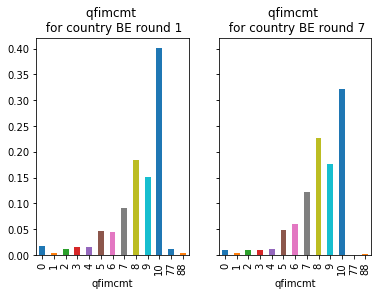

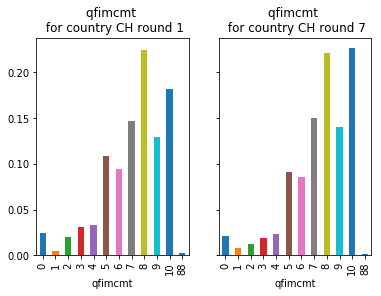

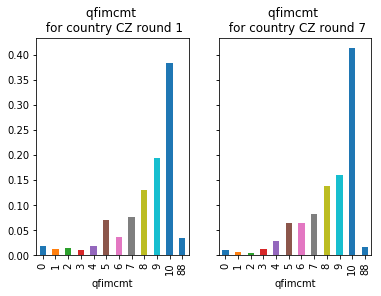

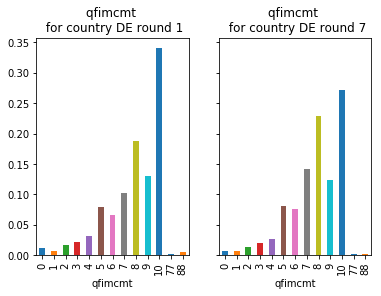

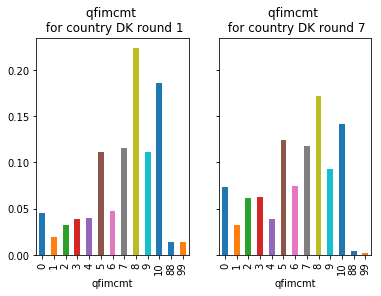

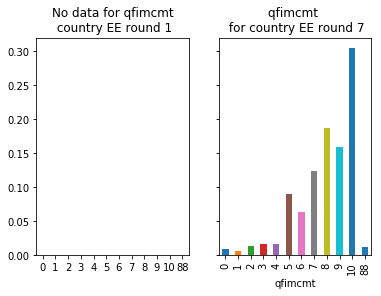

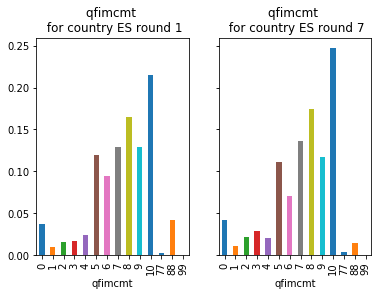

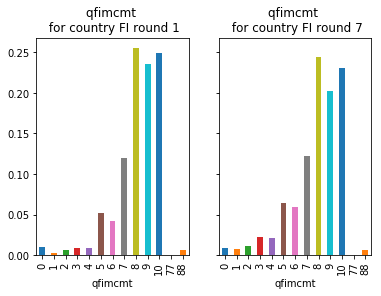

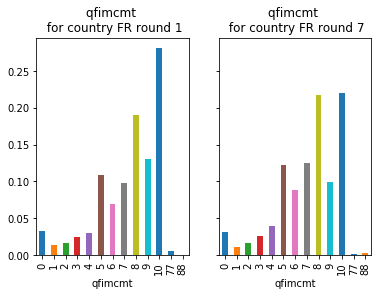

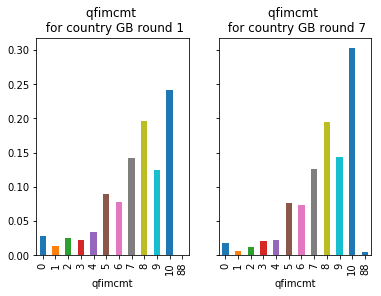

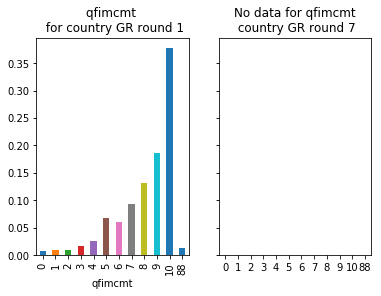

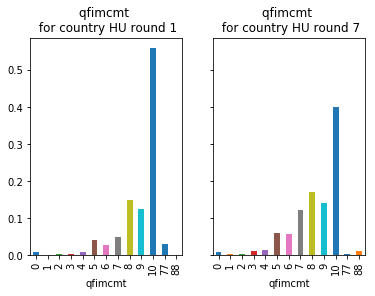

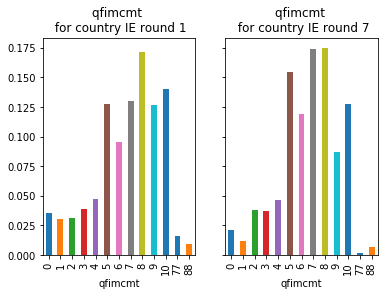

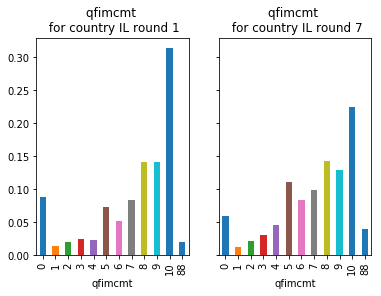

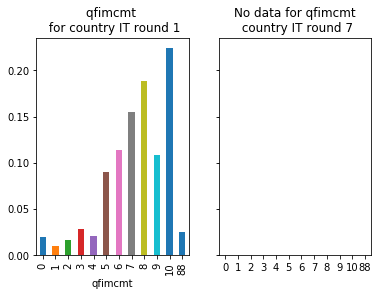

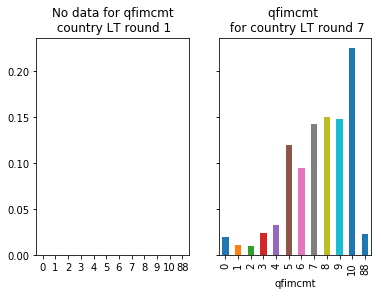

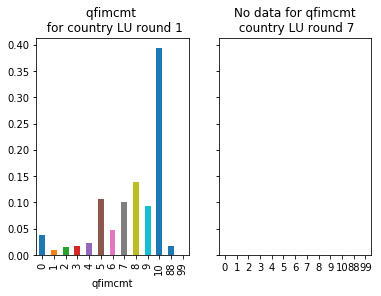

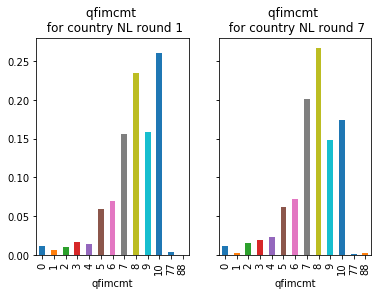

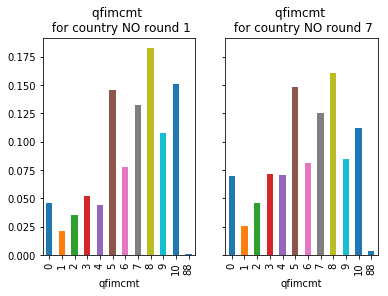

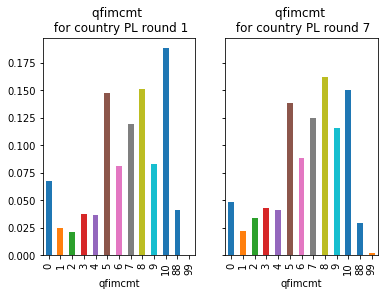

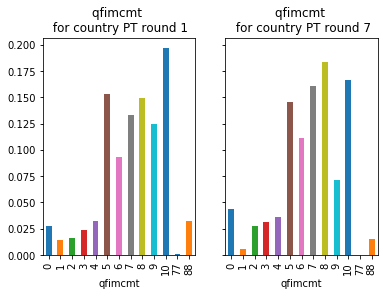

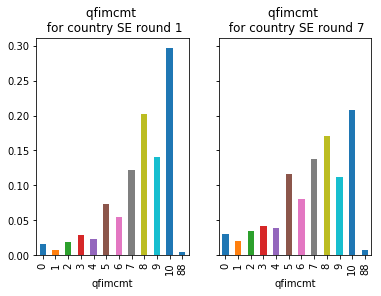

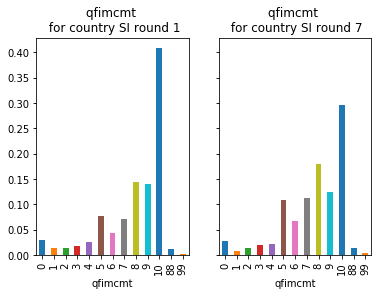

In [172]:
explore_imm3("qfimcmt")

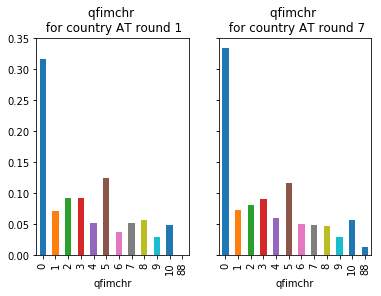

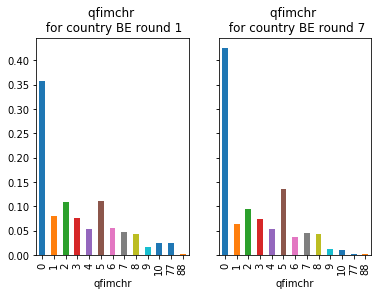

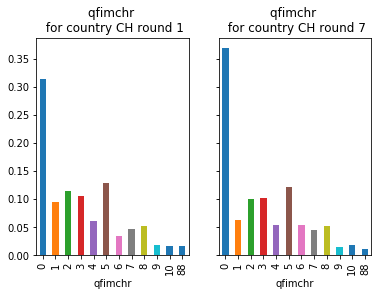

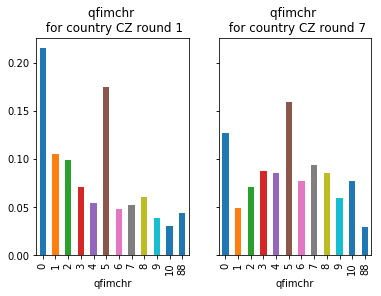

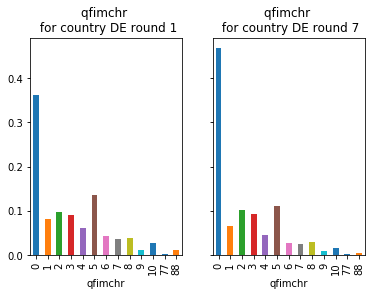

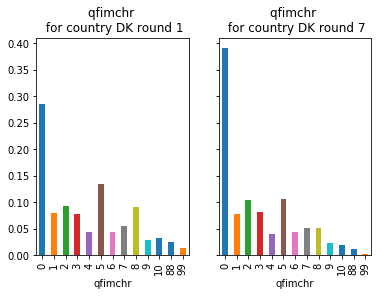

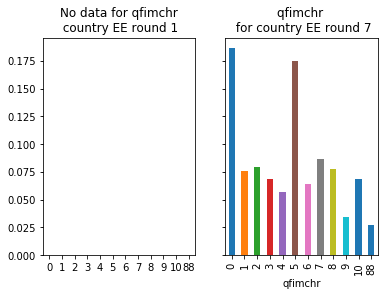

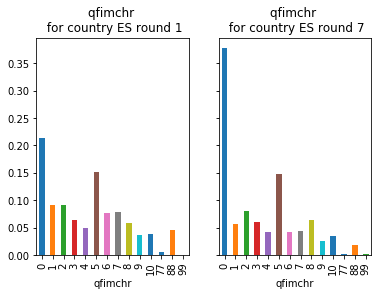

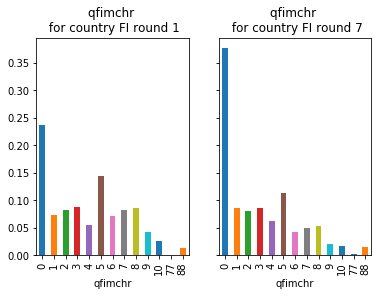

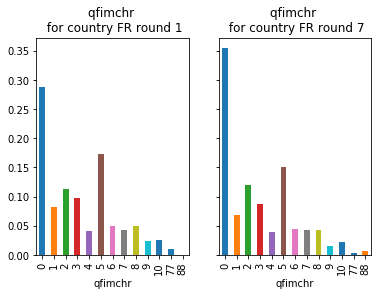

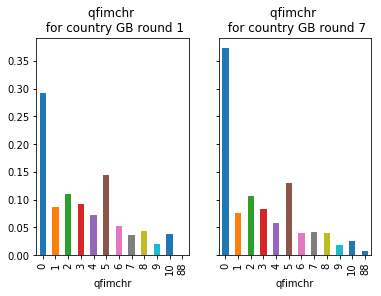

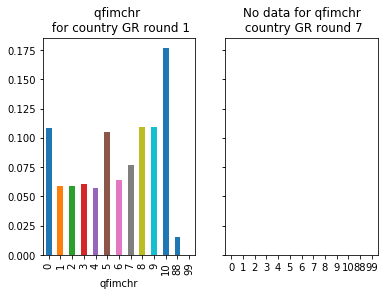

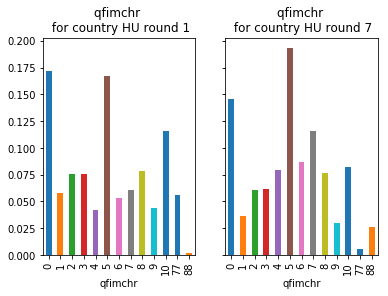

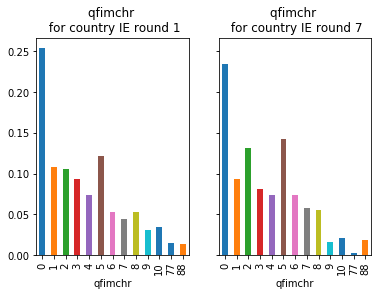

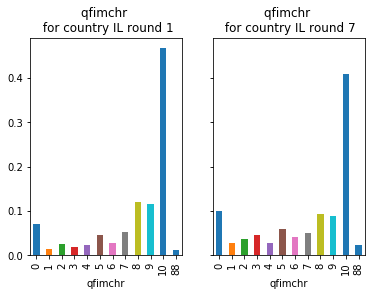

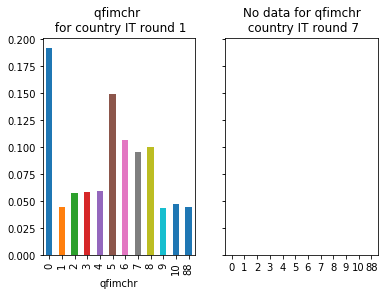

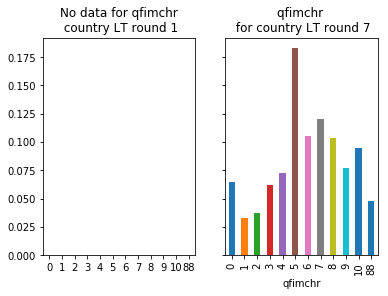

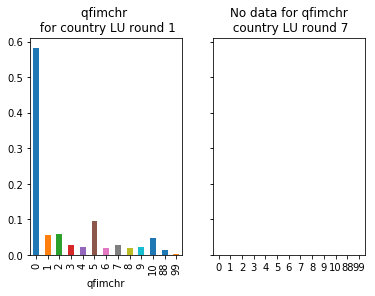

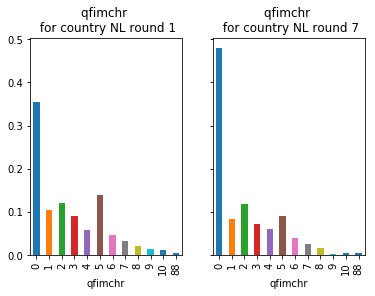

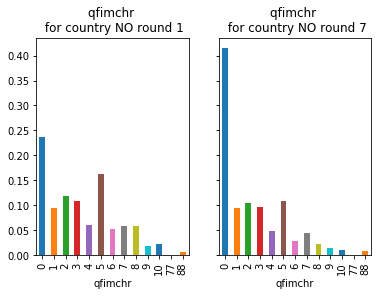

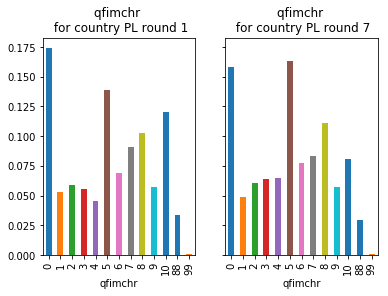

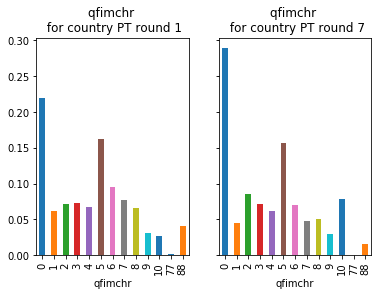

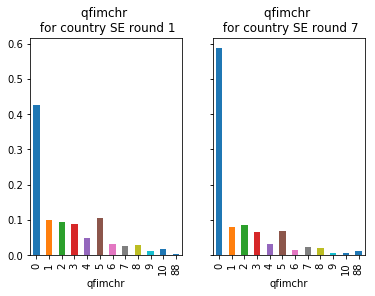

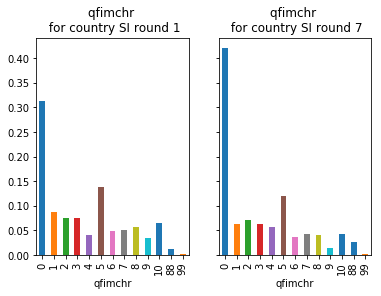

In [173]:
explore_imm3("qfimchr")

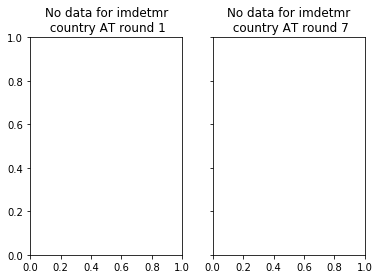

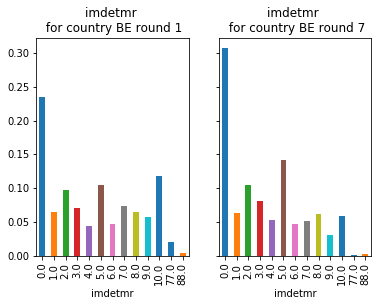

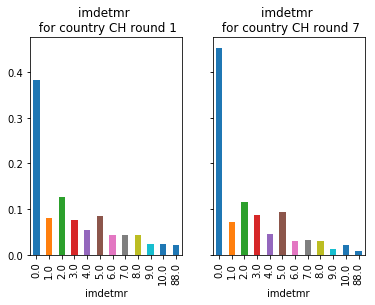

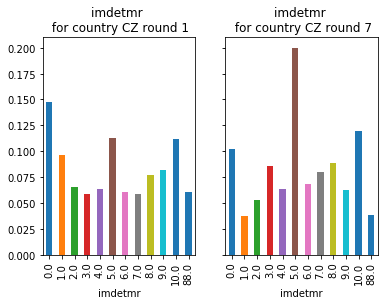

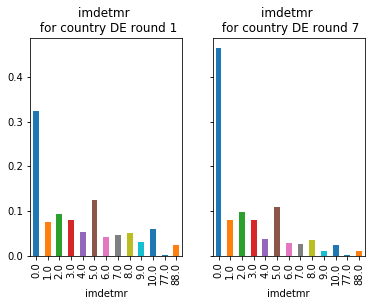

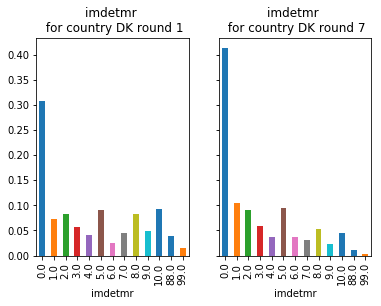

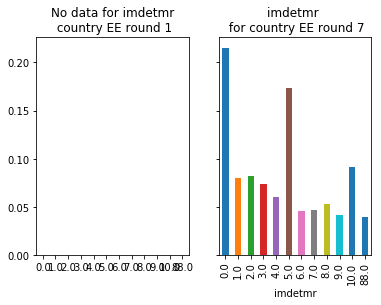

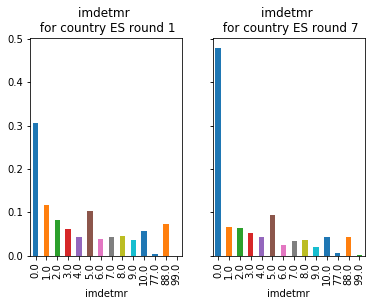

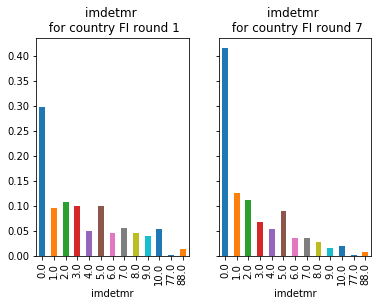

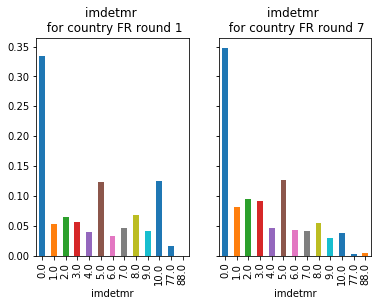

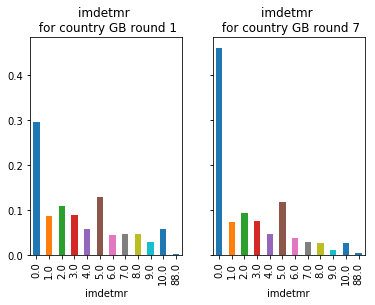

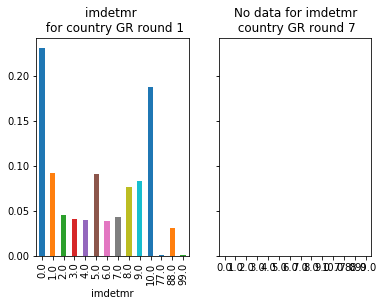

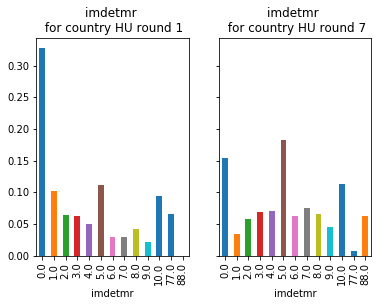

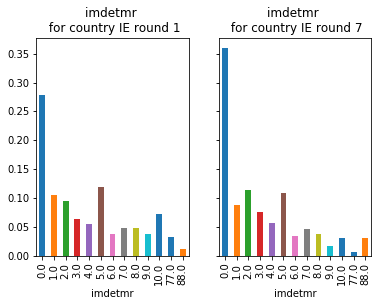

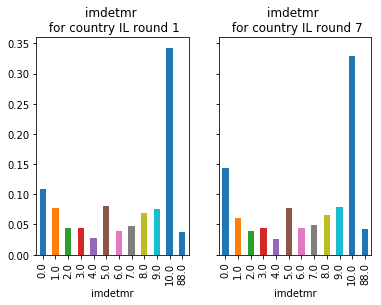

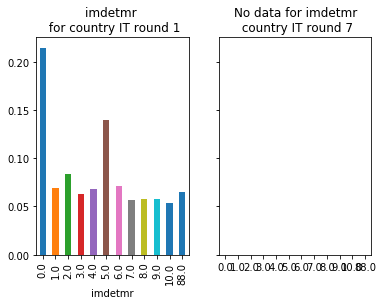

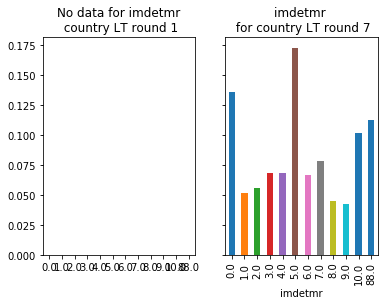

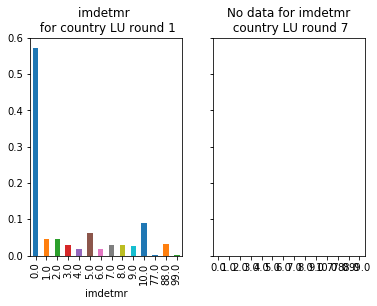

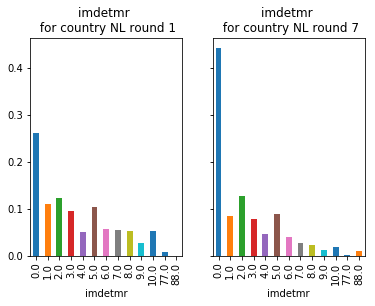

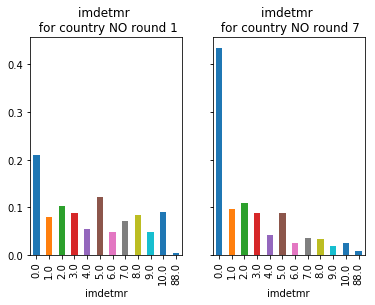

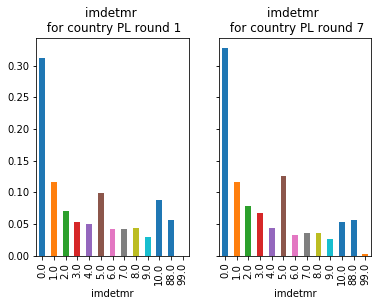

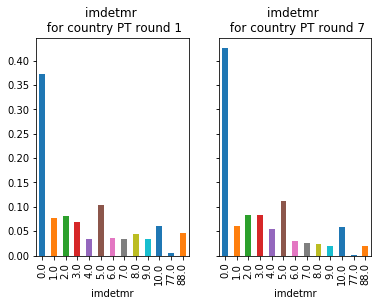

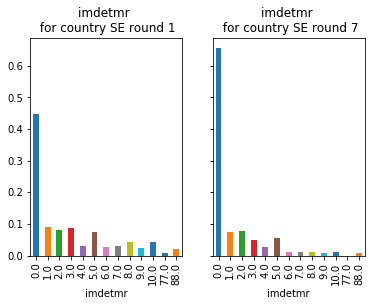

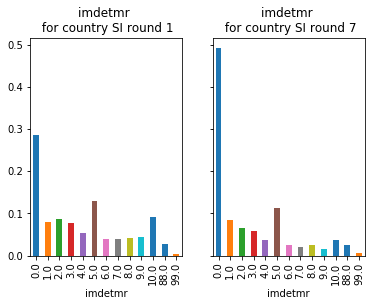

In [175]:
explore_imm3("imdetmr")